In [4]:
'''
I want to find where states are having serious issues with rates recalls that have been
 classified as Class I, which pose a serious health threat.
This is a short sciprt to plot the FDA-reported recalls, grouped by classification, for
 each state normalized by the acres of farm operations in each state to see which have a
 significant amount per area farmed.

Last Updated: L.Bittle 20190204 - taken from full script BITTLE_TDI_project.py

'''

'\nI want to find where states are having serious issues with rates recalls that have been\n classified as Class I, which pose a serious health threat.\nThis is a short sciprt to plot the FDA-reported recalls, grouped by classification, for\n each state normalized by the acres of farm operations in each state to see which have a\n significant amount per area farmed.\n\nLast Updated: L.Bittle 20190204 - taken from full script BITTLE_TDI_project.py\n\n'

In [5]:
import pandas as pd
import pylab as pl
import numpy as np
import json
from collections import Counter
import re
#import state_abbrev_dict
from importlib import reload
import nltk


In [6]:
def get_abbrev_to_state():
    
    abbrev_keys=us_state_abbrev = {
        'AL': 'Alabama',
        'AK': 'Alaska',
        'AZ': 'Arizona',
        'AR': 'Arkansas',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DE': 'Delaware',
        'DC': 'District of Columbia',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'IA': 'Iowa',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'ME': 'Maine',
        'MD': 'Maryland',
        'MA': 'Massachusetts',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MS': 'Mississippi',
        'MO': 'Missouri',
        'MT': 'Montana',
        'NE': 'Nebraska',
        'NV': 'Nevada',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NY': 'New York',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VT': 'Vermont',
        'VA': 'Virginia',
        'WA': 'Washington',
        'WV': 'West Virginia',
        'WI': 'Wisconsin',
        'WY': 'Wyoming',
    }
    
    return abbrev_keys


def get_state_to_abbrev():
    
    state_keys=us_state_abbrev = {
        'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY',
    }
    
    return state_keys


def get_state_info(my_key,my_dict):
    if my_key in my_dict.keys():
        return my_dict[my_key]


In [7]:
with open('/Users/laurenbittle/jobs_resumes/TDI_challenge/project/food-enforcement-0001-of-0001.json') as data_file:
    data=json.load(data_file)
df=pd.DataFrame(data['results'])


print(df.agg({'state': 'nunique'})) # 59 unique states/regions (Canada regions incl)
print(df['state'].unique())


state    59
dtype: int64
['CA' 'PA' 'MI' 'WI' 'NJ' 'FL' 'OR' 'IL' 'WA' 'MN' 'TX' 'MA' 'OH' 'AR'
 'TN' 'AZ' 'VT' 'NC' 'IA' 'PR' 'NY' 'CT' 'ND' 'NM' 'MO' 'MD' 'IN' 'NH'
 'OK' 'GA' 'MS' 'CO' 'KY' '' 'LA' 'ME' 'SD' 'UT' 'MT' 'AK' 'KS' 'NE' 'SC'
 'VA' 'WY' 'DE' 'HI' 'ID' 'DC' 'Ontario' 'AL' 'RI' 'NV' 'New Brunswick'
 'WV' 'Quebec' 'Nova Scotia' 'Alberta' 'British Columbia']


In [8]:
dfops=pd.read_csv('/Users/laurenbittle/jobs_resumes/TDI_Challenge/project/allstates_operations_USDAquery.csv'\
                  ,header='infer'\
                  ,low_memory=False)


In [9]:
# # Added a column of state abbreviations for joining to other 'df' later
#state_keys=state_abbrev_dict.get_state_to_abbrev()
#abbrev_keys=state_abbrev_dict.get_abbrev_to_state()
state_keys=get_state_to_abbrev()
abbrev_keys=get_abbrev_to_state()


state_col=[]#np.zeros(len(dfops['State']))
for iname in range(len(dfops['State'])):
    #state_col.append(state_abbrev_dict.get_state_info(dfops['State'][iname].title(),state_keys))
    state_col.append(get_state_info(dfops['State'][iname].title(),state_keys))
dfops['state'] = np.asarray(state_col)

dfops.info()
dfops.head()#['Data Item'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 22 columns):
Program             150 non-null object
Year                150 non-null int64
Period              150 non-null object
Week Ending         0 non-null float64
Geo Level           150 non-null object
State               150 non-null object
State ANSI          150 non-null int64
Ag District         0 non-null float64
Ag District Code    0 non-null float64
County              0 non-null float64
County ANSI         0 non-null float64
Zip Code            0 non-null float64
Region              0 non-null float64
watershed_code      150 non-null int64
Watershed           0 non-null float64
Commodity           150 non-null object
Data Item           150 non-null object
Domain              150 non-null object
Domain Category     150 non-null object
Value               150 non-null object
CV (%)              150 non-null float64
state               150 non-null object
dtypes: float64(9), int64

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%),state
0,CENSUS,2012,YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,0,NaN,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,NOT SPECIFIED,"8,902,654",3.1,AL
1,CENSUS,2012,YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,0,NaN,FARM OPERATIONS,"FARM OPERATIONS - AREA OPERATED, MEASURED IN A...",TOTAL,NOT SPECIFIED,206,1.7,AL
2,CENSUS,2012,YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,0,NaN,FARM OPERATIONS,FARM OPERATIONS - NUMBER OF OPERATIONS,TOTAL,NOT SPECIFIED,"43,223",4.1,AL
3,CENSUS,2012,YEAR,NaN,STATE,ALASKA,2,NaN,NaN,NaN,...,NaN,0,NaN,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,NOT SPECIFIED,"833,861",0.2,AK
4,CENSUS,2012,YEAR,NaN,STATE,ALASKA,2,NaN,NaN,NaN,...,NaN,0,NaN,FARM OPERATIONS,"FARM OPERATIONS - AREA OPERATED, MEASURED IN A...",TOTAL,NOT SPECIFIED,"1,094",1.8,AK


In [10]:
dfops2=dfops[['Year'\
              ,'State'\
              ,'state'\
              ,'State ANSI'\
              ,'Commodity'\
              ,'Data Item'\
              ,'Domain'\
              ,'Value'\
              ,'CV (%)']]
dfops2.head()

df_dfops2_merge=pd.merge(dfops2\
                         ,df\
                         ,how='inner'\
                         ,on='state')


df_dfops2_merge.head()


,Year,State,state,State ANSI,Commodity,Data Item,Domain,Value,CV (%),address_1,...,product_quantity,product_type,reason_for_recall,recall_initiation_date,recall_number,recalling_firm,report_date,status,termination_date,voluntary_mandated
0,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,208 Old Fort Drive,...,268 units of 3 oz,Food,"Pistachios, which were supplied by ARO and sub...",20130628,F-1732-2013,"Priester Pecan Company, Inc.",20131120,Terminated,20131112,Voluntary: Firm Initiated
1,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,208 Old Fort Drive,...,701.5 pounds,Food,"Pistachios, which were supplied by ARO and sub...",20130628,F-1730-2013,"Priester Pecan Company, Inc.",20131120,Terminated,20131112,Voluntary: Firm Initiated
2,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,801 N Main St,...,"2,200 lbs.",Food,One lot of raw peanuts was found to contain 26...,20141201,F-0744-2015,Sessions Co. Inc.,20141231,Terminated,20150120,Voluntary: Firm Initiated
3,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,22877 Highway 87,...,280 units,Food,Product testing at the supplier found aflatoxi...,20141201,F-0745-2015,"Pea River Peanut Company, LLC",20141231,Terminated,20141230,Voluntary: Firm Initiated
4,2012,ALABAMA,AL,1,FARM OPERATIONS,FARM OPERATIONS - ACRES OPERATED,TOTAL,"8,902,654",3.1,2435 US Highway 78,...,468 units,Food,The firm received a notice from their supplier...,20160802,F-1613-2017,J M Exotic Foods Inc,20170322,Terminated,20170329,Voluntary: Firm Initiated


In [16]:
class_III_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III')\
                                      & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]\
                                      .drop_duplicates('event_id').state.value_counts()

class_II_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class II')\
                                     & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]\
                                      .drop_duplicates('event_id').state.value_counts()

class_I_statecounts=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I')\
                                    & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]\
                                      .drop_duplicates('event_id').state.value_counts()

print(len(class_III_statecounts.values)) #39 states have Class III counts.


c3search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class III')\
                         & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_III=c3search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(float)
class_III_statecounts_peracres=class_III_statecounts.sort_index(level=0)/acres_III.values

c2search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class II')\
                         & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_II=c2search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(float)
class_II_statecounts_peracres=class_II_statecounts.sort_index(level=0)/acres_II.values

c1search=df_dfops2_merge[(df_dfops2_merge['classification'] == 'Class I')\
                         & (df_dfops2_merge['Data Item'] == 'FARM OPERATIONS - ACRES OPERATED')]
acres_I=c1search.sort_index(level='state').drop_duplicates('state').Value.str.replace(',','').astype(float)
class_I_statecounts_peracres=class_I_statecounts.sort_index(level=0)/acres_I.values


39


Text(0.5,1,'Number of Recalls per Total Acres Farmed in each State')

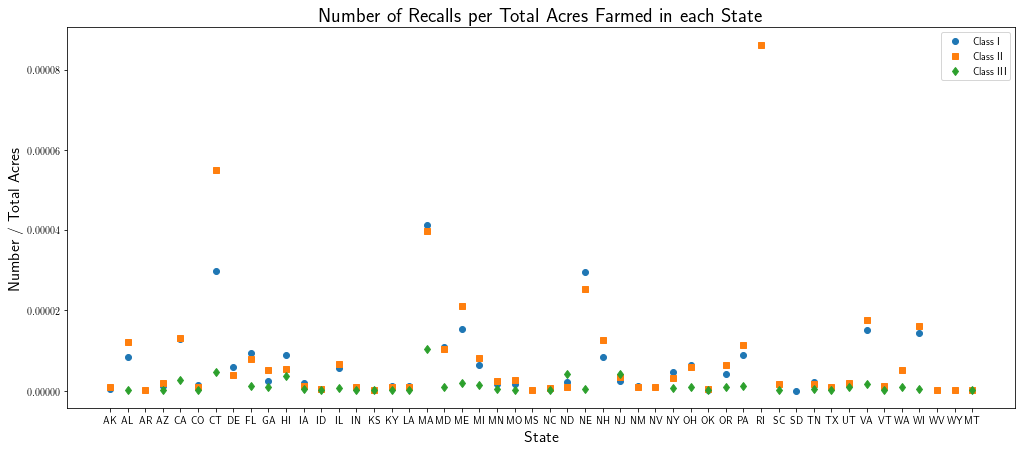

In [18]:
# # In order to normalize the number of recalls per state, I use the
# #  total acres farmed in each state to understand the relative amount
# #  of recalls per state.

pl.figure(figsize=[17,7])
pl.plot(class_I_statecounts_peracres\
        ,marker='o'\
        ,linestyle='None'\
        ,label='Class I')
pl.plot(class_II_statecounts_peracres\
        ,marker='s'\
        ,linestyle='None'\
        ,label='Class II')
pl.plot(class_III_statecounts_peracres\
        ,marker='d'\
        ,linestyle='None'\
        ,label='Class III')
pl.legend(loc=1)
pl.xlabel('State',fontsize=16)
pl.ylabel('Number / Total Acres',fontsize=16)
pl.title('Number of Recalls per Total Acres Farmed in each State',fontsize=20)
